 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [ ]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline


# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [ ]:
Path.cwd()

In [ ]:
# Reading whale returns
whale_csv_path = Path("/Users/heianmac/Desktop/USYD-VIRT-FIN-PT-09-2022-U-LOLC/04-Pandas/Homework/Instructions/Starter_Code/Resources/whale_returns.csv")



In [ ]:
whale_df = pd.read_csv(whale_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)



In [ ]:
# Count nulls
whale_df.isnull().mean() * 100



In [ ]:
# Drop nulls
whale_df = whale_df.dropna().copy()
whale_df.head()


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [ ]:
# Reading algorithmic returns
algo_csv_path = Path("/Users/heianmac/Desktop/USYD-VIRT-FIN-PT-09-2022-U-LOLC/04-Pandas/Homework/Instructions/Starter_Code/Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [ ]:
# Count nulls
algo_df.isnull().mean() * 100 

In [ ]:
# Drop nulls
algo_df = algo_df.dropna().copy()
algo_df.head()

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [ ]:
# Reading S&P 500 Closing Prices
sp500_csv_path = Path("/Users/heianmac/Desktop/USYD-VIRT-FIN-PT-09-2022-U-LOLC/04-Pandas/Homework/Instructions/Starter_Code/Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df ["Close"].head()

In [ ]:
# Check Data Types
sp500_df.dtypes

In [ ]:
# Fix Data Types
sp500_df ['Close'] = sp500_df ['Close'].str.replace("$", " ")
sp500_df ['Close'] = sp500_df ['Close'].astype("float")
sp500_df.dtypes


In [ ]:
# Calculate Daily Returns
daily_returns = sp500_df.pct_change()
daily_returns

In [142]:
# Drop nulls
daily_returns = daily_returns.dropna().copy()
daily_returns

,sp500_closing
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [ ]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns = daily_returns.rename(columns={'Close' : 'sp500_closing'})

## Combine Whale, Algorithmic, and S&P 500 Returns

In [ ]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, daily_returns], axis ="columns", join = "inner")
combined_df.head()

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [ ]:
# Plot daily returns of all portfolios
combined_df.plot()

#### Calculate and Plot cumulative returns.

In [ ]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + combined_df).cumprod()
# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


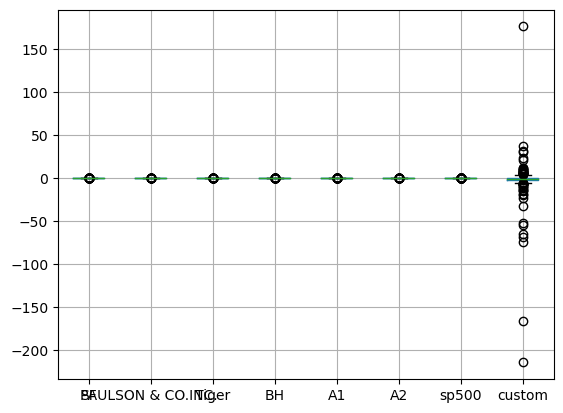

In [181]:
# Box plot to visually show risk
combined_df = combined_df.rename(columns={'SOROS FUND MANAGEMENT LLC' : 'SF','PAULSON & CO.INC.':'Paul', 'TIGER GLOBAL MANAGEMENT LLC' : 'Tiger' , 'BERKSHIRE HATHAWAY INC' : 'BH', 'Algo 1' : 'A1', 'Algo 2' : 'A2', 'sp500_closing' : 'sp500'})
combined_df.boxplot();

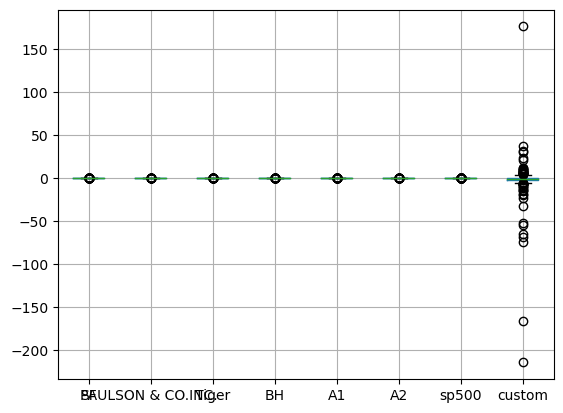

In [182]:
# Box plot to visually show risk

combined_df.boxplot();

### Calculate Standard Deviations

In [ ]:
# Calculate the daily standard deviations of all portfolios
combined_df.std()


# Determine which portfolios are riskier than the S&P 500


In [143]:
# Calculate  the daily standard deviation of S&P 500
sp500_risk = combined_df['sp500_closing'].std()


# Determine which portfolios are riskier than the S&P 500
combined_df.std() > sp500_risk

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
sp500_closing                  False
dtype: bool

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_df.std() * np.sqrt(252)
annualized_std.head()

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [ ]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_portfolios_std = combined_df.rolling(window = 21).std()
all_portfolios_std

In [ ]:
# Plot the rolling standard deviation
combined_df.rolling(window = 21).std().plot()

### Calculate and plot the correlation

In [ ]:
# Calculate the correlation
correlation_combined_portfolio = combined_df.corr()

# Display de correlation matrix
correlation_combined_portfolio

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [ ]:
# Calculate covariance of a single portfolio
covariance = combined_df['SOROS FUND MANAGEMENT LLC'].cov(combined_df['sp500_closing'])
print(f"covariance of Soros Fund Management wrt to SP500 = {covariance}") 

In [ ]:
# Calculate variance of S&P 500

variance = combined_df['sp500_closing'].var()
print(f" Variance of S&P 500 is : {variance}")

In [ ]:
# Computing beta
beta = covariance / variance
print(f" Beta of S&P 500 is : {beta}")


# Plot beta trend
beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500_closing
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


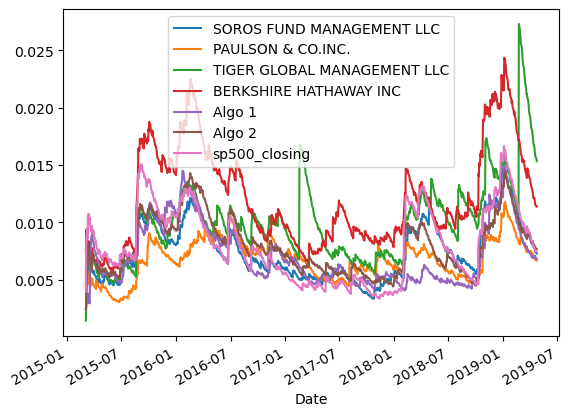

In [160]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife = 21).std().plot()
combined_df.head()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [153]:
# Annualized Sharpe Ratios
sharpe_ratios = ((combined_df.mean()- combined_df['sp500_closing'].mean()) * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.920419
PAULSON & CO.INC.              0.150484
TIGER GLOBAL MANAGEMENT LLC    0.287699
BERKSHIRE HATHAWAY INC         0.966507
Algo 1                         1.963017
Algo 2                         1.035152
sp500_closing                  0.000000
dtype: float64

<AxesSubplot:>

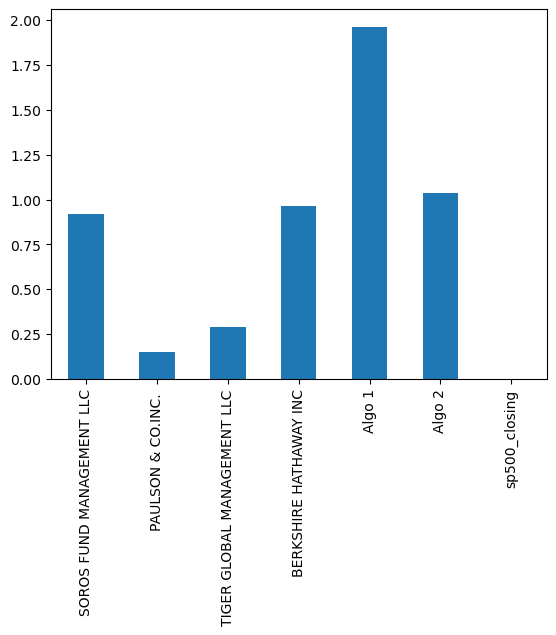

In [154]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind ="bar")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo1 with the highest sharpe ratio is the best

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [149]:
# Reading data from 1st stock
google_fin = Path("/Users/heianmac/Desktop/USYD-VIRT-FIN-PT-09-2022-U-LOLC/04-Pandas/Homework/Instructions/Starter_Code/Resources/goog_historical.csv")
google_df = pd.read_csv(google_fin, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
google_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [150]:
# Reading data from 2nd stock

cost_fin = Path("/Users/heianmac/Desktop/USYD-VIRT-FIN-PT-09-2022-U-LOLC/04-Pandas/Homework/Instructions/Starter_Code/Resources/cost_historical.csv")

cost_df = pd.read_csv(cost_fin, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

cost_df.head()


,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [151]:
# Reading data from 3rd stock

aapl_fin = Path("/Users/heianmac/Desktop/USYD-VIRT-FIN-PT-09-2022-U-LOLC/04-Pandas/Homework/Instructions/Starter_Code/Resources/aapl_historical.csv")

aapl_df = pd.read_csv(aapl_fin, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

aapl_df.head()


,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [133]:
# Combine all stocks in a single DataFrame

combined_his = pd.concat([google_df, cost_df, aapl_df], axis ="rows", join = "inner")
combined_his.head()



,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [132]:
# Reset Date index

combined_his = combined_his.reset_index()
combined_his.sample()

,Trade DATE,Symbol,NOCP
176,2018-08-24,GOOG,1220.65


In [134]:
# Reorganize portfolio data by having a column per symbol

combined_his = combined_his.pivot_table(values = "NOCP", index = "Trade DATE", columns = "Symbol")

combined_his.head()



Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [137]:
# Calculate daily returns

combined_his = combined_his.pct_change()

# Drop NAs

combined_his = combined_his.dropna().copy()

# Display sample data

combined_his.head()


Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-16,-1.700021,1.099033,-0.904711
2018-05-17,-0.172330,-0.919822,1.001843
2018-05-18,-0.746698,1.353968,-2.270438
2018-05-21,5.938149,0.185718,-1.732643
2018-05-22,-0.540897,-0.026037,-0.170725


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [144]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

portfolio_return = combined_his.dot(weights)

# Display sample data

portfolio_return.head()

Trade DATE
2018-05-16   -0.501900
2018-05-17   -0.030103
2018-05-18   -0.554389
2018-05-21    1.463741
2018-05-22   -0.245886
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [161]:
# Join your returns DataFrame to the original returns DataFrame

combined_df["custom"] = portfolio_return

combined_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500_closing,custom
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,NaN


In [162]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

combined_df.dropna()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500_closing,custom
Date,,,,,,,,
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,-0.501900
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.030103
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,-0.554389
2018-05-21,0.002503,-0.001195,-0.001153,0.010370,-0.003092,0.004924,0.003146,1.463741
2018-05-22,-0.002345,0.001168,-0.000240,-0.002455,0.011234,-0.005628,-0.003238,-0.245886
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.604063
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,-1.400454
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-68.568856


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [163]:
# Calculate the annualized `std`
combined_df.std()

SOROS FUND MANAGEMENT LLC       0.007895
PAULSON & CO.INC.               0.007023
TIGER GLOBAL MANAGEMENT LLC     0.010894
BERKSHIRE HATHAWAY INC          0.012919
Algo 1                          0.007620
Algo 2                          0.008342
sp500_closing                   0.008587
custom                         23.796776
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [164]:
# Calculate rolling standard deviation

combined_df.rolling(window = 21).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500_closing,custom
Date,,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006571,7.581246
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006505,15.319904
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006137,15.309051


<AxesSubplot:xlabel='Date'>

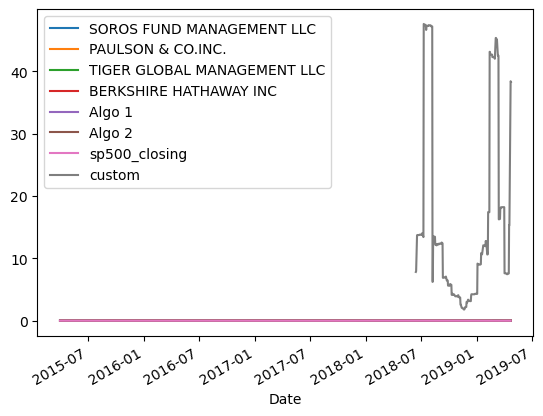

In [165]:
# Plot rolling standard deviation

combined_df.rolling(window = 21).std().plot()

### Calculate and plot the correlation

In [168]:
# Calculate and plot the correlation

correlation = combined_df.corr()

correlation


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500_closing,custom
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.000574,0.053601
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.013549,0.080563
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,-0.001505,0.023217
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,-0.013856,0.054765
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,-0.033963,0.059503
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,-0.002192,0.094674
sp500_closing,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000,-0.014990
custom,0.053601,0.080563,0.023217,0.054765,0.059503,0.094674,-0.014990,1.000000


<AxesSubplot:>

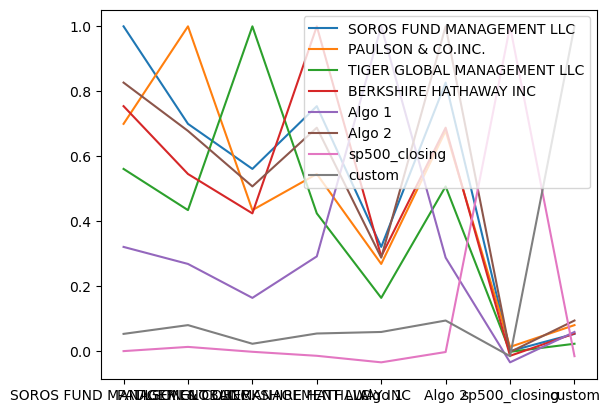

In [169]:
# plot the correlation

correlation.plot()

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [173]:
# Calculate and plot Beta

variance2 = combined_df['sp500_closing'].var()

covariance2 = combined_df['SOROS FUND MANAGEMENT LLC'].cov(combined_df['sp500_closing'])


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [174]:
# Calculate Annualized Sharpe Ratios

sharpe_ratios2 = ((combined_df.mean()- combined_df['sp500_closing'].mean()) * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios2

SOROS FUND MANAGEMENT LLC      0.920419
PAULSON & CO.INC.              0.150484
TIGER GLOBAL MANAGEMENT LLC    0.287699
BERKSHIRE HATHAWAY INC         0.966507
Algo 1                         1.963017
Algo 2                         1.035152
sp500_closing                  0.000000
custom                        -1.668158
dtype: float64

<AxesSubplot:>

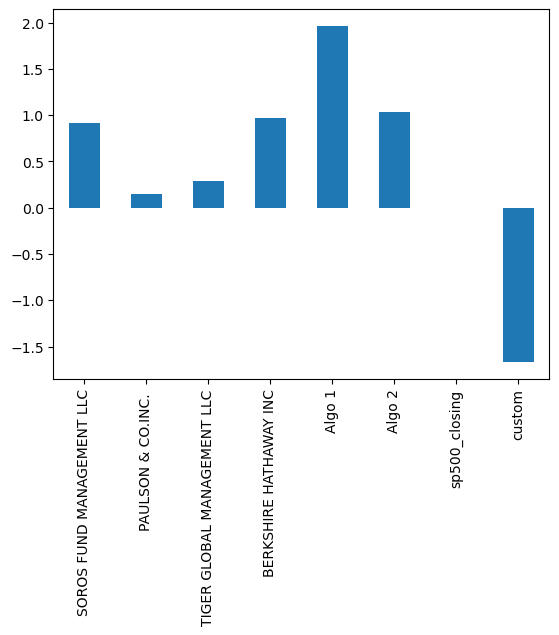

In [175]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios2.plot(kind = "bar")

### How does your portfolio do?

Write your answer here!

In [ ]:
# Algorithmic portfolio is better from all portfolios 